In [6]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon

## MODEL

In [104]:
diabetes=pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()#boş değerleri sil tablodaki
df.head()#ilk 5 tablo değeri

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.info()#TÜM DEĞİŞKENLER SÜREKLİ DEĞİŞKEN GÖRÜLÜYOR,OUTCOME Kategorik değişkeni 0-1 OLARAK DÖNÜŞTÜRÜLMİŞ SAYISAL YANİ 1 SINIF OLARAK İLGİLENİLİYOR DİABET HASTASI YADA DEĞİL,BİRDEN FAZLA SINIF YOK YANİ!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.shape#768 satır(GÖZLEM) ,9 sutun(özellik)

(768, 9)

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
df["Outcome"].value_counts()#0 türünde 500 ,1 türünde 268 ,yani diabet olmayan 500,diabet olan 268 kişi

Outcome
0    500
1    268
Name: count, dtype: int64

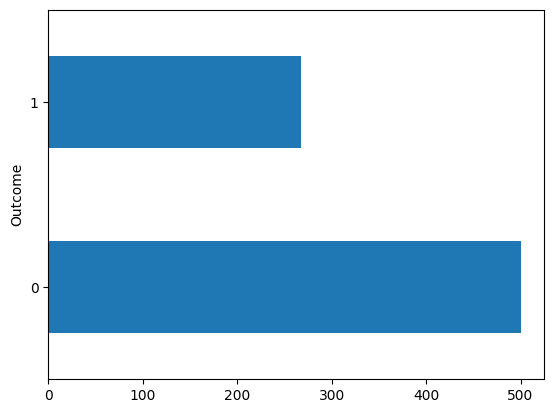

In [17]:
df["Outcome"].value_counts().plot.barh();

# Boş değer kontrolü

In [32]:
#df.isnull()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
#Describe betimsel istatistikleri
df.describe().T#DATAFRAMEİN GENEL ÖZELLİKLERİNİ ÇIKARIR ,T(TRANSPOSE),yerini değiştirir satırların ve sütünların

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
y=df["Outcome"]#bağımlı değişken seç
X=df.drop(["Outcome"],axis=1)#bağımsız değişken,bağımlı hariç değişkenler seçildi
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# StatsModel

In [34]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()#Modelin anlamlılığı,değişkenlerin anlamlılığı vb ifade eden tablo içerir

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:                 0.05922
Time:                        21:49:20   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

# Scikit-Learn

In [35]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)#lojistikRegresyon,eğitimi
loj_model

LogisticRegression(solver='liblinear')

In [44]:
loj_model.intercept_#Sabit değer

array([-5.84073324])

In [41]:
loj_model.coef_#tüm bağımsız değişkenlerin katsayı değerlerini verir nparray olarak

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

# Tahmin & Model Tuning

In [45]:
#NOT TEST,TRAİN OLARAK AYIRMADAN YAPIYORUM İLK MODEL LOJİSTİK REGRESYONDA

In [46]:
#TUNE EDİLECEK BİR DURUM YOK Dışsal bir model hiperparametresi yok,sadece sabit değeri optimize edilebilir,Model tuning değilde model doğrulama yapılacak

In [49]:
y_pred=loj_model.predict(X)

# Confusion-Matrix

In [54]:
confusion_matrix(y,y_pred)

#448 52    1-1  0-1  #SOL:GERCEK DEĞERİ,SAĞ:TAHMİN DEĞERİ
#120 148   1-0  0-0  #SOL:GERCEK DEĞERİ,SAĞ:TAHMİN DEĞERİ

array([[448,  52],
       [121, 147]], dtype=int64)

In [55]:
accuracy_score(y,y_pred)#Doğru sınıflandırma oranı 0.77

0.7747395833333334

In [57]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [62]:
loj_model.predict(X)[0:10]# tahmin sonuçları,1-0 olarak döndürür, array([1, 0, 1, 0, 1], dtype=int64)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [70]:
loj_model.predict_proba(X)[0:10]#X i kullanarak model kur bu modele ilişkin OLASILIK DEĞERLERİNİ DÖNDÜRÜR
#İKİLİ CIKTI ÜRETİR,0.İNDEXİ=0 SINIFINA AİT OLASILIK 1.İNDEXİ 1.SINIFA AİT OLASILIK
#ÖRNEĞİN ilk tahmin 0 olma olasılığı 0.35,1 olma olasılığı 0.64 yani diabetmiş ilk değerler sonucu kişi
"""
array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       """
#predict_proba kulalnma amacı bir eşik değeri belirlemek ve sonuç  0.5 dan büyükse sen diabet(1) olarak sınıflandır değilse 0 yaz gibi  

'\narray([[0.35208919, 0.64791081],\n       [0.91613598, 0.08386402],\n       [0.22544273, 0.77455727],\n       [0.92033572, 0.07966428],\n       [0.16985872, 0.83014128],\n       [0.79768782, 0.20231218],\n       [0.8787278 , 0.1212722 ],\n       [0.2764273 , 0.7235727 ],\n       [0.32085978, 0.67914022],\n       '

In [65]:
y[0:10]#gercek değerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [83]:
y_probs=loj_model.predict_proba(X)[:,1]#ikinci sutun yani diabet(1) seçilir

In [84]:
y_pred=[1 if i>0.5 else 0 for i in y_probs]#eğer prob ile dönen diabet değeri(1) 0.5 den büyükse 

In [86]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

# Confusion Matrix

In [87]:
confusion_matrix(y,y_pred)

#448 52    1-1  0-1  #SOL:GERCEK DEĞERİ,SAĞ:TAHMİN DEĞERİ
#120 148   1-0  0-0  #SOL:GERCEK DEĞERİ,SAĞ:TAHMİN DEĞERİ

array([[448,  52],
       [121, 147]], dtype=int64)

In [88]:
accuracy_score(y,y_pred)#Doğru sınıflandırma oranı 0.77

0.7747395833333334

In [89]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# Bu bölümü tekrar et

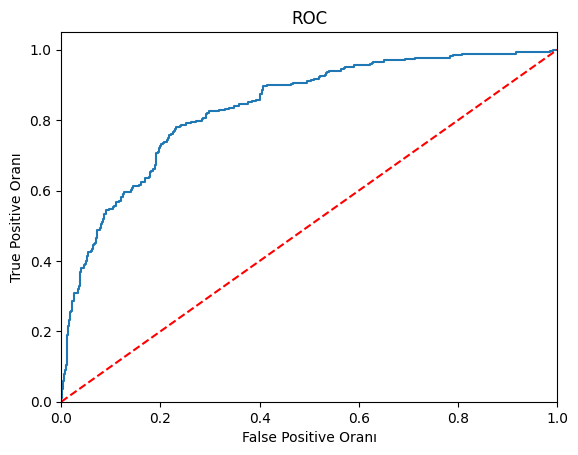

In [90]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# MODEL DOĞRULAMA

# Burası her zaman yapılan işlemleri içerir üst bölümler örnek gibiydi

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [117]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [118]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

# Cross-validation

In [100]:
#cross_val_score(loj_model,X_test,y_test,cv=10)#cv=cross validation
cross_val_score(loj_model,X_test,y_test,cv=10).mean() #ortalaması

0.7748188405797102

In [ ]:
#cros_val_score verdiğin model üzerinde test verileriyle  test eder
#cross_val_score: Bu fonksiyon, çapraz doğrulama yapar.
#Çapraz doğrulama, modelin performansını daha güvenilir bir şekilde değerlendirmek için kullanılır.
#cv=10 parametresi, 10 katlı çapraz doğrulama yapılacağını belirtir.

#cross_val_score(loj_model, X_test, y_test, cv=10).mean(): 
#Bu satır, çapraz doğrulama sonuçlarının ortalamasını alır. 
#Çapraz doğrulama, veri setini farklı parçalara böler, 
#her parçayı sırayla test seti olarak kullanır ve modelin performansını bu parçalar üzerinde değerlendirir.
#Sonunda, bu farklı test setleri üzerinde elde edilen sonuçların ortalaması alınarak
#daha güvenilir bir performans ölçümü elde edilir.


# GAUSSİAN NAİİVE BAYES 

In [105]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [106]:
from sklearn.naive_bayes import GaussianNB

In [109]:
nb=GaussianNB()#Model Kurma ve Eğitim
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [110]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

# Predict_proba(testverisi)

In [111]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [119]:
y_pred = nb_model.predict(X_test)

# Confusion Matrix

In [122]:
confusion_matrix(y_test,y_pred)

array([[119,  32],
       [ 27,  53]], dtype=int64)

In [113]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Cross Validation

In [114]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN -REGRESYON VE CLASSİFİCATİON OLARAK KULLANILABİLİR

# MODEL VE TAHMİN

In [123]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [125]:
#KNN OKLİD BENZERİ MANATHAN HESAPLAMASI NASIL YAPILIR?

In [127]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [153]:
y_pred=knn_model.predict(X_test)

In [154]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [136]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [140]:
knn = KNeighborsClassifier()#Optimize etmek için Modeli parametreleri güncelle ve cros_val kullan
knn_cv = GridSearchCV(knn, knn_params, cv=10)#gridSearchcv ile 10 katlı cross validation yapıldı
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

# best_params ve best_score

In [155]:
print("En iyi skor:" + str(knn_cv.best_score_))#10 katlı cross_val yapıldı,en iyi hangi parça seçimiyle model max sonuç verdi
print("En iyi parametreler: " + str(knn_cv.best_params_))#11 parametreyle en iyi sonuc veren model olusturulmus cross_val ile birlikte

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


# En iyi parametre değerlerini vererek modeli tekrar eğit

In [156]:
knn = KNeighborsClassifier(11)
knn_tuned=knn.fit(X_train,y_train)

In [157]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [158]:
y_pred=knn_tuned.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred)

0.7316017316017316

# SVC(SUPPORT VECTOR CLASSİFİCATİON)

In [160]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [161]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [162]:
svm_model

SVC(kernel='linear')

In [163]:
y_pred = svm_model.predict(X_test)

In [164]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [165]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)#Eğitim süresi  3-5 dk

Fitting 10 folds for each of 9 candidates, totalling 90 fits


KeyboardInterrupt: 

In [166]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# En iyi parametre değerlerini vererek modeli tekrar eğit

In [168]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [171]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)#0.7445

0.7445887445887446

# Confusion Matrix

In [172]:
confusion_matrix(y_test,y_pred)

array([[122,  29],
       [ 30,  50]], dtype=int64)

# Cross Validation

In [173]:
cross_val_score(svc, X_test, y_test, cv = 10).mean()

0.7490942028985507

# RBF SVC(DOĞRUSAL OLMAYAN SVC)

# MODEL VE TAHMİN

In [174]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [175]:
svc_model=SVC(kernel="rbf").fit(X_train,y_train)

In [176]:
svc_model

SVC()

In [177]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [178]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# YSA(YAĞAY SİNİR AĞLARI)

In [179]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [180]:
from sklearn.preprocessing import  StandardScaler

In [182]:
scaler=StandardScaler()

In [184]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [185]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [186]:
from sklearn.neural_network import MLPClassifier

In [188]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)

# !!! MODEL PARAMETRELERİNİ GÖRME !!! dir(Model)

In [201]:
#mlpc.coefs_dir
dir(mlpc)#mlpc modelinde erişilebilecek değerler listesi

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_parameter_constraints',
 '_predict',
 '_random_state',
 '

In [207]:
y_pred=mlpc.predict(X_test_scaled)

In [209]:
accuracy_score(y_test,y_pred)#0.72

0.7272727272727273

# Confusion Matrix

In [210]:
confusion_matrix(y_test,y_pred)

array([[118,  33],
       [ 30,  50]], dtype=int64)

# Cross Validation

In [215]:
cross_val_score(mlpc, X_test_scaled, y_test, cv = 10).mean()

0.7623188405797101

# Model Tuning

In [225]:
#solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
 #   The solver for weight optimization.

#?mlpc nesneye ait özellikler hakkında açıklamaları verir her nesnenin önüne ? ile ,?svc,?knn

In [227]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\python311\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
 

In [218]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [229]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [230]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [231]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [232]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [233]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403